In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data from the CSV file
file_path = 'movies.csv'
movies_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
movies_data.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_minutes
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,175
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,152
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,202
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,96


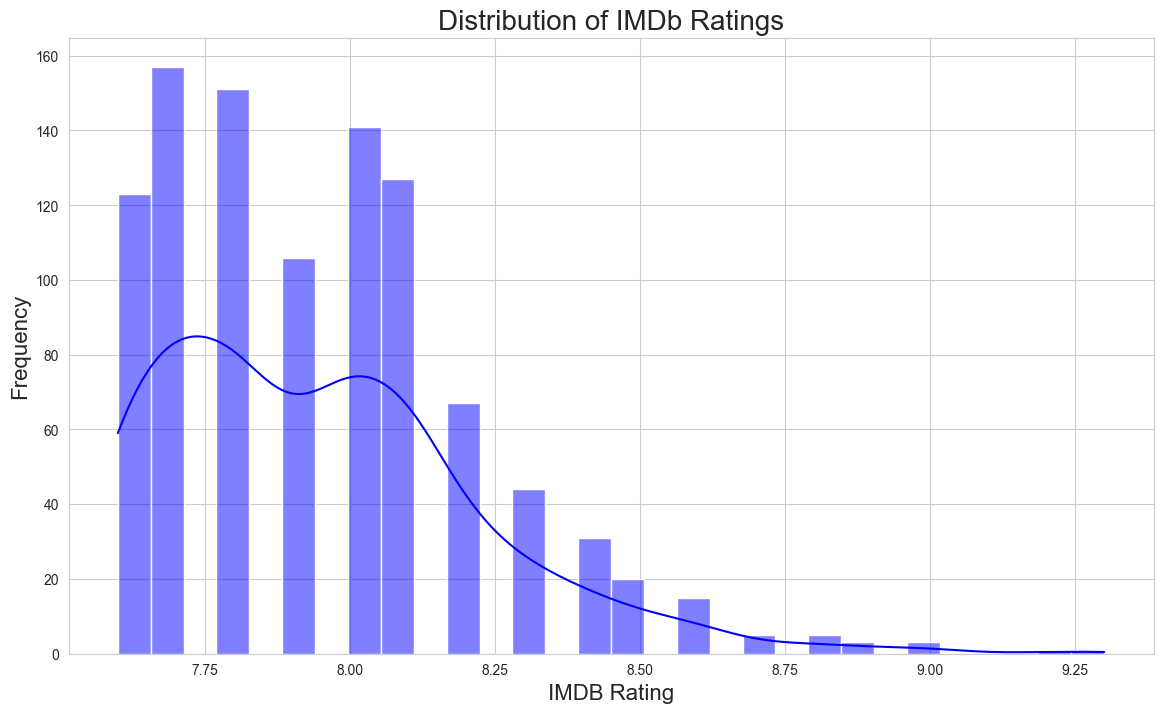

In [5]:


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the histogram and a density plot for IMDB ratings
plt.figure(figsize=(14, 8))
sns.histplot(movies_data['IMDB_Rating'], bins=30, kde=True, color='blue')

# Plot enhancements
plt.title('Distribution of IMDb Ratings', fontsize=20)
plt.xlabel('IMDB Rating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Display the plot
plt.show()


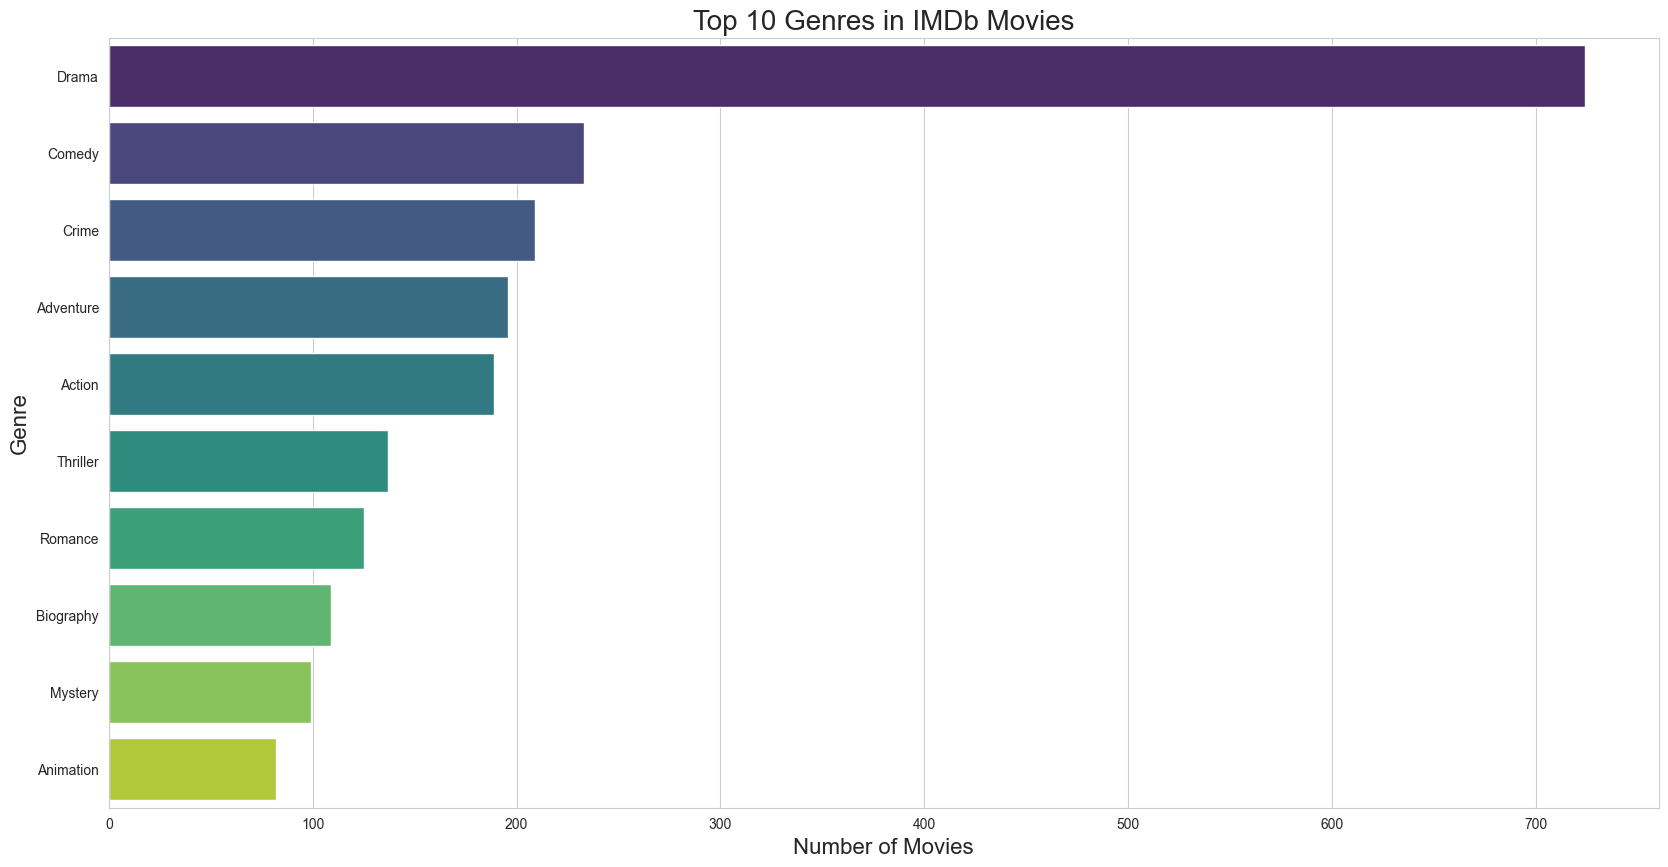

In [6]:
from collections import Counter

# Splitting the genres for each movie and creating a flat list of all genres
all_genres = movies_data['Genre'].str.split(', ').sum()

# Counting the occurrence of each genre
genre_counts = Counter(all_genres)

# Getting the top 10 genres
top_10_genres = dict(genre_counts.most_common(10))

# Creating the horizontal bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=list(top_10_genres.values()), y=list(top_10_genres.keys()), palette="viridis")

# Plot enhancements
plt.title('Top 10 Genres in IMDb Movies', fontsize=20)
plt.xlabel('Number of Movies', fontsize=16)
plt.ylabel('Genre', fontsize=16)

# Display the plot
plt.show()


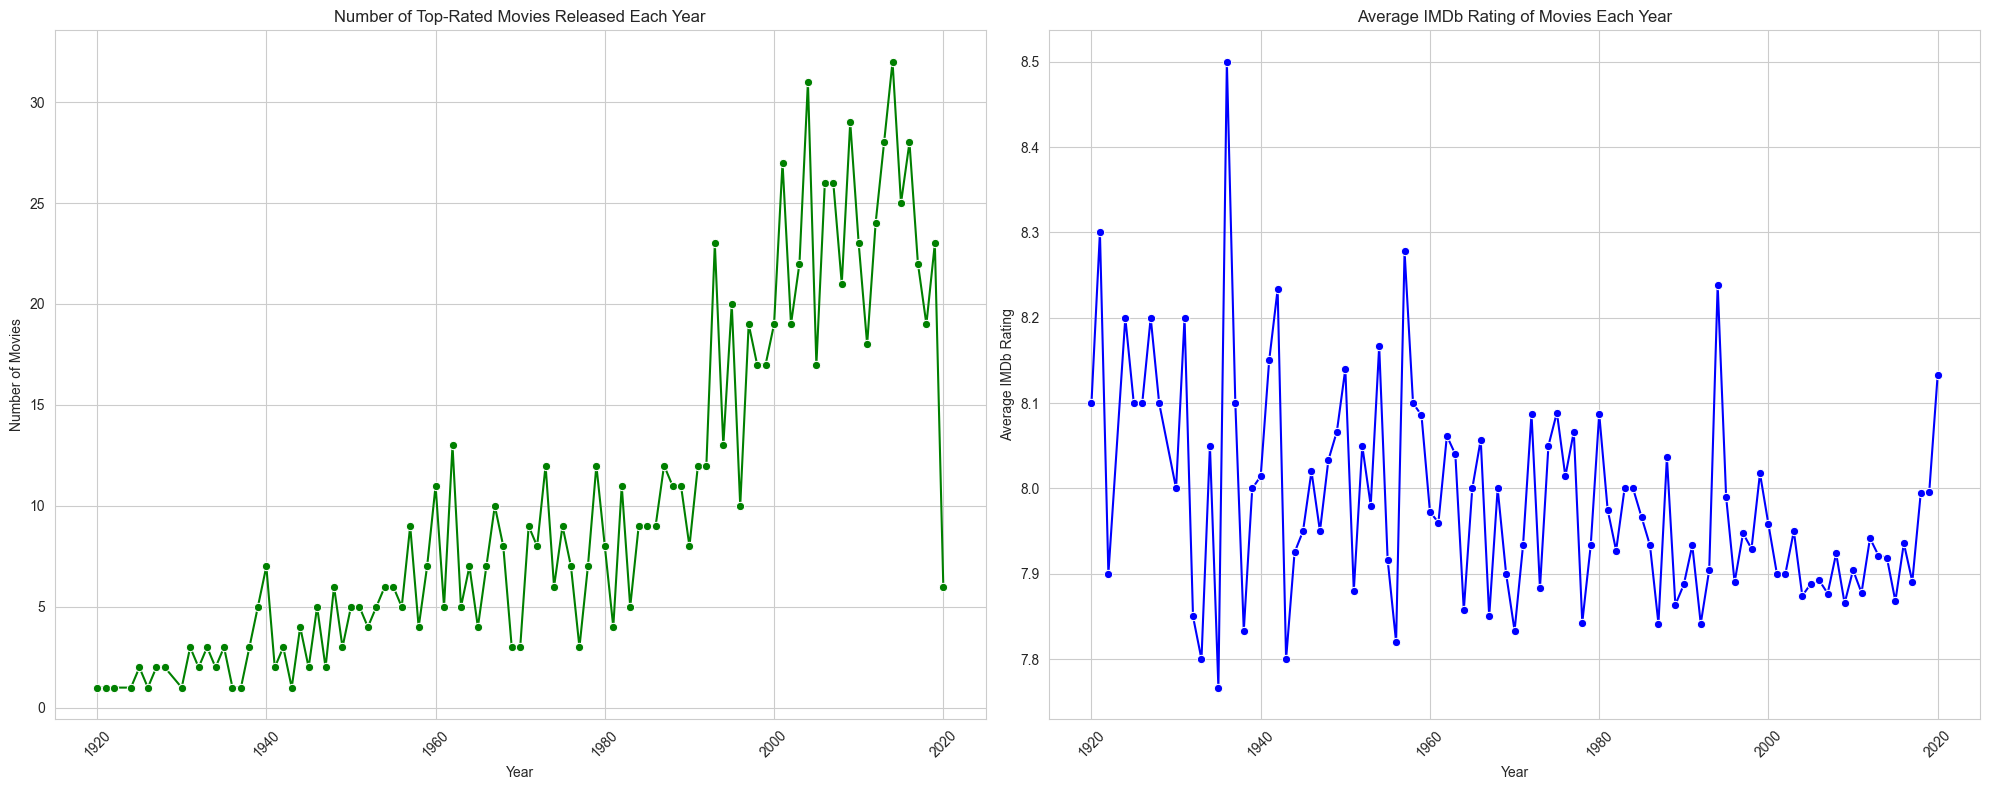

In [7]:
# Group by release year and calculate the number of movies and average rating for each year
yearly_data = movies_data.groupby('Released_Year').agg(
    Number_of_Movies=('IMDB_Rating', 'size'),
    Average_Rating=('IMDB_Rating', 'mean')
).reset_index()

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharex=True)

# Plot Number of Movies Released Each Year
sns.lineplot(ax=axes[0], x='Released_Year', y='Number_of_Movies', data=yearly_data, marker='o', color='green')
axes[0].set_title('Number of Top-Rated Movies Released Each Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Movies')

# Plot Average IMDb Rating of Movies Each Year
sns.lineplot(ax=axes[1], x='Released_Year', y='Average_Rating', data=yearly_data, marker='o', color='blue')
axes[1].set_title('Average IMDb Rating of Movies Each Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average IMDb Rating')

# Rotate x-axis labels for better readability
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adjust layout for better fit and to prevent label overlap
plt.tight_layout()

# Display the plots
plt.show()


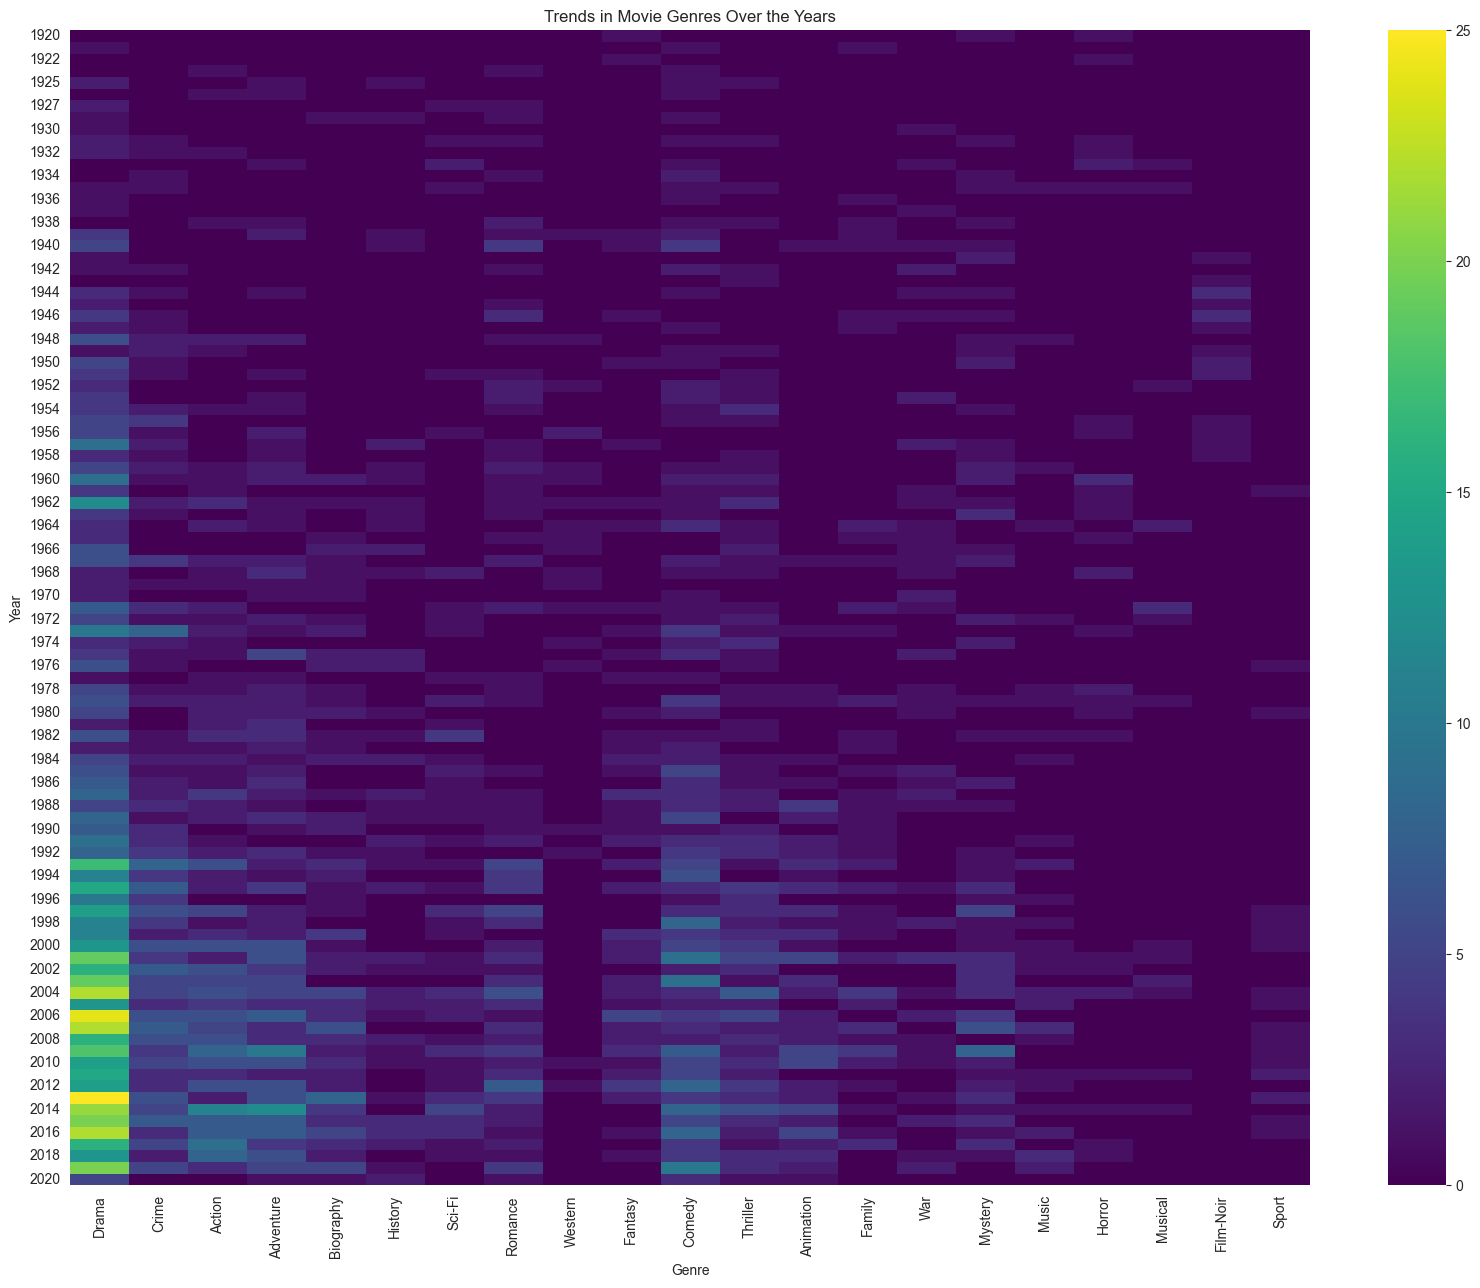

In [11]:
import numpy as np

# Prepare the data for heatmap
# Initialize a dataframe to hold the year-genre counts
genre_year_counts = pd.DataFrame(index=np.sort(movies_data['Released_Year'].unique()), columns=genre_counts.keys())

# Fill the dataframe with zeros
genre_year_counts.fillna(0, inplace=True)

# For each movie, increment the count of its genres for its release year
for i, row in movies_data.iterrows():
    genres = row['Genre'].split(', ')
    year = row['Released_Year']
    for genre in genres:
        if genre in genre_year_counts.columns:
            genre_year_counts.at[year, genre] += 1

# Now that we have the counts, we can create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(genre_year_counts, cmap='viridis')
plt.title('Trends in Movie Genres Over the Years')
plt.ylabel('Year')
plt.xlabel('Genre')

# Show the heatmap
plt.show()


# Show the heatmap
plt.show()


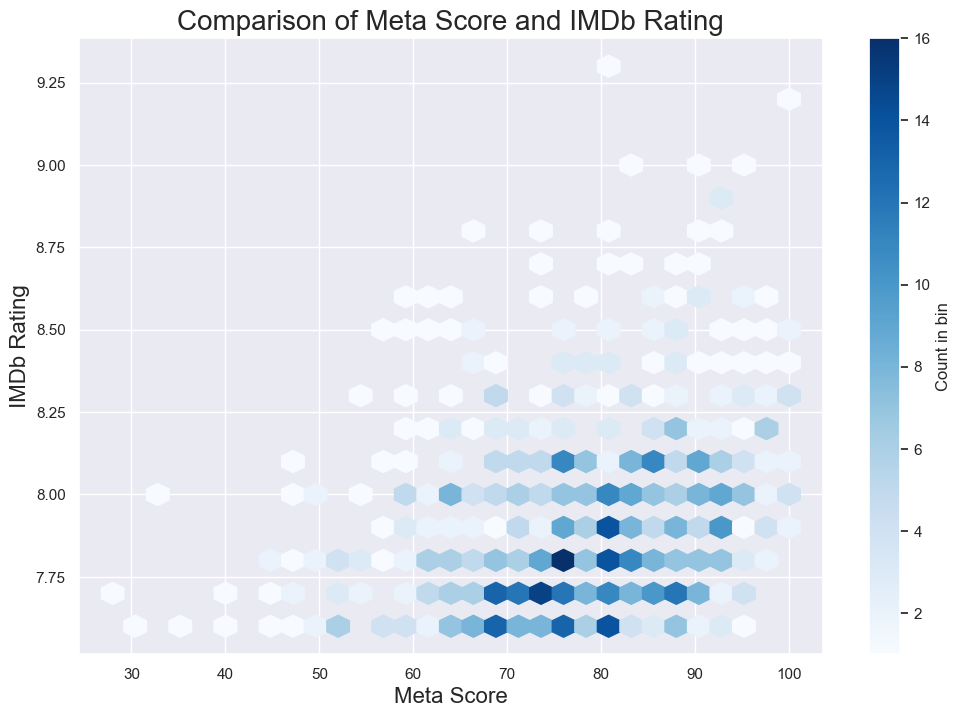

In [20]:
# Let's try a hexbin plot for a different style which may show the density of points better
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")

# Using hexbin plot to show density
plt.hexbin(movies_data['Meta_score'], movies_data['IMDB_Rating'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')

# Plot enhancements
plt.title('Comparison of Meta Score and IMDb Rating', fontsize=20)
plt.xlabel('Meta Score', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=16)

# Display the plot
plt.show()
